In [ ]:
import json
from collections import defaultdict
from sklearn import linear_model
import numpy
import random
import gzip
import dateutil.parser
import math

In [ ]:
answers = {}

In [ ]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

### Question 1

In [ ]:
!wget 'https://cseweb.ucsd.edu/classes/fa23/cse258-a/data/fantasy_10000.json.gz'
f = gzip.open("fantasy_10000.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

f.close()

--2023-10-16 21:11:04--  https://cseweb.ucsd.edu/classes/fa23/cse258-a/data/fantasy_10000.json.gz
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3798634 (3.6M) [application/x-gzip]
Saving to: ‘fantasy_10000.json.gz.1’

fantasy_10000.json. 100%[===================>]   3.62M  6.55MB/s    in 0.6s    

2023-10-16 21:11:05 (6.55 MB/s) - ‘fantasy_10000.json.gz.1’ saved [3798634/3798634]



In [ ]:
dataset[0]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '18245960',
 'review_id': 'dfdbb7b0eb5a7e4c26d59a937e2e5feb',
 'rating': 5,
 'review_text': 'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would 

In [ ]:
# Get ratings and review lengths list
ratings = [d['rating'] for d in dataset]
lengths = [len(d['review_text']) for d in dataset]

In [ ]:
# Get the max review length
max_length = max(lengths)
max_length

In [ ]:
# Extend sacled length to the dataset
for d in dataset:
    l = len(d['review_text']) / max_length
    d['scaled_length'] = l

In [ ]:
dataset[0]

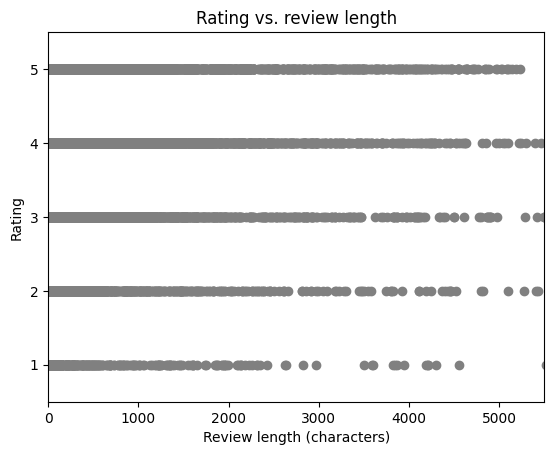

In [ ]:
# generating a quick scatter plot of the data to see overall trends...
import matplotlib.pyplot as plt
plt.scatter(lengths, ratings, color='grey')
plt.xlim(0, 5500)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length (characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.show()

In [ ]:
def feature(datum):
    # ...
    feat = len(datum['review_text']) / max_length # Normalize review length
    return [1] + [feat]

In [ ]:
# Get features X and labels y
X = [feature(d) for d in dataset]
y = [d['rating'] for d in dataset]
X[:10], y[:10]

([[1, 0.14581294561722355],
  [1, 0.10631902698168601],
  [1, 0.1061792254997903],
  [1, 0.1251922270376066],
  [1, 0.12316510555011884],
  [1, 0.0328533482454914],
  [1, 0.05752830980008388],
  [1, 0.03718719418425835],
  [1, 0.04305885642387809],
  [1, 0.03830560603942402]],
 [5, 5, 5, 4, 3, 5, 5, 5, 4, 5])

In [ ]:
# Fit a linear regression model to the data (sklearn)
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
# # Extract the model coefficients (theta)
theta = model.coef_
theta

array([3.68568136, 0.98335392])

In [ ]:
theta[0], theta[1]

(3.685681355016931, 0.9833539181066099)

In [ ]:
# Extract X
X1 = [X[i][1] for i in range(len(X))]
X1[:10]

[0.14581294561722355,
 0.10631902698168601,
 0.1061792254997903,
 0.1251922270376066,
 0.12316510555011884,
 0.0328533482454914,
 0.05752830980008388,
 0.03718719418425835,
 0.04305885642387809,
 0.03830560603942402]

In [ ]:
# Get out predicted results
y_pred = [theta[0] + theta[1] * x for x in X1]
y_pred[:10]

[3.829067086400294,
 3.7902305867686543,
 3.7900931124336754,
 3.808789621990854,
 3.806796244133655,
 3.7179878237370563,
 3.7422520438608946,
 3.722249528121413,
 3.7280234501905416,
 3.723349322801247]

In [ ]:
y[:10], y_pred[:10]

([5, 5, 5, 4, 3, 5, 5, 5, 4, 5],
 [3.829067086400294,
  3.7902305867686543,
  3.7900931124336754,
  3.808789621990854,
  3.806796244133655,
  3.7179878237370563,
  3.7422520438608946,
  3.722249528121413,
  3.7280234501905416,
  3.723349322801247])

In [ ]:
# Get MSE
MSE = sum([(y[i] - y_pred[i])**2 for i in range(len(y))]) / len(y)
MSE

1.5522086622355358

In [ ]:
# Plot the line of best fit...
xplot = numpy.arange(0,1,0.01)
yplot = [(theta[0] + theta[1]*x).item() for x in xplot]
# xplot, yplot

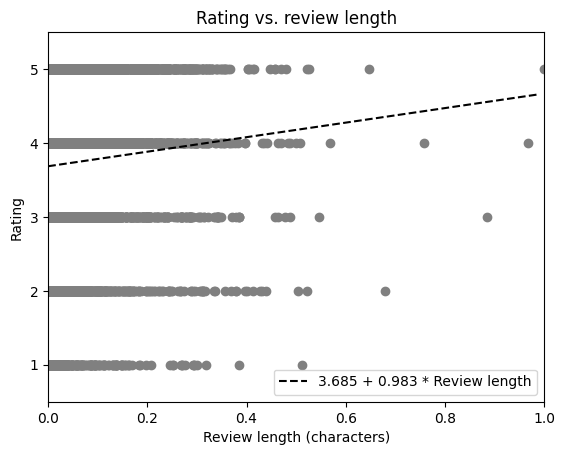

In [ ]:
plt.scatter([l / max_length for l in lengths], ratings, color='grey')
plt.plot(numpy.array(xplot), yplot, color = 'k', linestyle = '--',\
         label = r"3.685 + 0.983 * Review length")
plt.xlim(0, 1)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length (characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.legend(loc='lower right')
plt.show()

In [ ]:
answers['Q1'] = [theta[0], theta[1], MSE]
answers

{'Q1': [3.685681355016931, 0.9833539181066099, 1.5522086622355358]}

In [ ]:
assertFloatList(answers['Q1'], 3)

### Question 2

In [ ]:
# Extend parsed date, weekday, month to dataset
for d in dataset:
    t = dateutil.parser.parse(d['date_added'])
    d['parsed_date'] = t
    d['weekday'] = t.weekday()
    d['month'] = t.month

In [ ]:
dataset[2]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '17315048',
 'review_id': '885c772fb033b041f42d57cef5be0a43',
 'rating': 5,
 'review_text': 'Mark Watney is a steely-eyed missile man. A man\'s man. A badass mechanical engineer botanist astronaut who is stranded on Mars during a Nasa mission gone wrong, and left to fend for himself. I listened to this on audio on a roadtrip, and it flew by - what a fun story. Not surprised at all it\'s being made into a movie directed by Ridley Scott starring Matt Damon. Also pretty amazing is that it was self-published. \n There were two great things about this book: the humor and the science. The science appealed to the mechanical engineer in me - Watney is a bit like McGyver except he knows a lot more about chemistry and botany. I didn\'t double-check all the science, but loved the descriptions of all the math: calorie calculations, creating water, etc. Just fun stuff. \n But the humor was top notch. Weir does a great job portraying a stra

In [ ]:
def feature_one_hot(datum):
  # ...
  # one_hot encoding, make the first weekday and month to be all 0
  weekday_one_hot = [0] * 6
  month_one_hot = [0] * 11
  if datum['weekday'] - 2 >= 0:
    weekday_one_hot[datum['weekday']-2] = 1
  if datum['month'] - 2 >= 0:
    month_one_hot[datum['month']-2] = 1
  return [1] + weekday_one_hot + month_one_hot + [datum['scaled_length']]

In [ ]:
X2 = [feature_one_hot(d) for d in dataset]
y = [d['rating'] for d in dataset]

In [ ]:
for idx, d in enumerate(dataset):
  d['one_hot'] = X2[idx]

In [ ]:
X2[:10], y[:10]

([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.14581294561722355],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.10631902698168601],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1061792254997903],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.1251922270376066],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.12316510555011884],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0328533482454914],
  [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05752830980008388],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.03718719418425835],
  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.04305885642387809],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.03830560603942402]],
 [5, 5, 5, 4, 3, 5, 5, 5, 4, 5])

In [ ]:
answers['Q2'] = [X2[0], X2[1]]
answers

{'Q1': [3.685681355016931, 0.9833539181066099, 1.5522086622355358],
 'Q2': [[1,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0.14581294561722355],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.10631902698168601]]}

In [ ]:
assertFloatList(answers['Q2'][0], 19)
assertFloatList(answers['Q2'][1], 19)

In [ ]:
# train model that use the one_hot encoding
model2 = linear_model.LinearRegression(fit_intercept=False)
model2.fit(X2, y) # train

LinearRegression(fit_intercept=False)

In [ ]:
theta2 = model2.coef_
theta2

array([ 3.65759160e+00,  1.05122772e-01,  7.41964741e-02,  1.01701873e-01,
        1.40327736e-02,  6.93721517e-02,  0.00000000e+00, -4.52317587e-02,
        5.65768706e-02, -1.22005798e-01, -9.85051799e-02,  4.26086192e-02,
       -1.08986137e-02,  8.30049198e-03, -1.63255690e-02, -2.68550155e-03,
       -1.08912416e-01, -9.17133773e-02,  9.95137274e-01])

In [ ]:
# Get mse2 (contains results using one-hot encoding)
y_pred = model2.predict(X2)

# Sum of square error
sse = sum([x**2 for x in (y - y_pred)])

# MSE
mse2 = sse / len(y)
mse2

1.5469038875971752

### Question 3

In [ ]:
def feature3(datum):
    # ...
    feat = [1]
    feat.append(datum['scaled_length'])
    feat.append(datum['weekday'])
    feat.append(datum['month'])
    return feat

In [ ]:
X3 = [feature3(d) for d in dataset]
Y3 = [d['rating'] for d in dataset]

In [ ]:
type(X3)

list

In [ ]:
X3[:10], Y3[:10]

([[1, 0.14581294561722355, 6, 7],
  [1, 0.10631902698168601, 2, 9],
  [1, 0.1061792254997903, 5, 4],
  [1, 0.1251922270376066, 1, 12],
  [1, 0.12316510555011884, 0, 7],
  [1, 0.0328533482454914, 1, 7],
  [1, 0.05752830980008388, 2, 3],
  [1, 0.03718719418425835, 0, 12],
  [1, 0.04305885642387809, 6, 10],
  [1, 0.03830560603942402, 1, 9]],
 [5, 5, 5, 4, 3, 5, 5, 5, 4, 5])

In [ ]:
model3 = linear_model.LinearRegression(fit_intercept=False)
model3.fit(X3, Y3) # train

LinearRegression(fit_intercept=False)

In [ ]:
theta = model3.coef_
theta

array([ 3.68774185,  0.98716703,  0.00968863, -0.00457118])

In [ ]:
# Get mse3 (contains results using the direct weekday/month values)
Y3_pred = model3.predict(X3)

# Sum of square error
sse = sum([x**2 for x in (Y3 - Y3_pred)])

# MSE
mse3 = sse / len(Y3)
mse3

1.5516353711453343

In [ ]:
answers['Q3'] = [mse2, mse3]
answers

{'Q1': [3.685681355016931, 0.9833539181066099, 1.5522086622355358],
 'Q2': [[1,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0.14581294561722355],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.10631902698168601]],
 'Q3': [1.5469038875971752, 1.5516353711453343]}

In [ ]:
assertFloatList(answers['Q3'], 2)

### Question 4

In [ ]:
random.seed(0)
random.shuffle(dataset)

In [ ]:
X2 = [feature_one_hot(d) for d in dataset]
X3 = [feature3(d) for d in dataset]
Y = [d['rating'] for d in dataset]

In [ ]:
train2, test2 = X2[:len(X2)//2], X2[len(X2)//2:]
train3, test3 = X3[:len(X3)//2], X3[len(X3)//2:]
trainY, testY = Y[:len(Y)//2], Y[len(Y)//2:]

In [ ]:
model4_2 = linear_model.LinearRegression(fit_intercept=False)
model4_3 = linear_model.LinearRegression(fit_intercept=False)
model4_2, model4_3

(LinearRegression(fit_intercept=False), LinearRegression(fit_intercept=False))

In [ ]:
model4_2.fit(train2, trainY)
model4_3.fit(train3, trainY)

LinearRegression(fit_intercept=False)

In [ ]:
theta4_2 = model4_2.coef_
theta4_3 = model4_3.coef_

In [ ]:
# Get test_mse2 (contains results using one-hot encoding)
y_pred_test2 = model4_2.predict(test2)

# Sum of square error
sse = sum([x**2 for x in (testY - y_pred_test2)])

# MSE
test_mse2 = sse / len(testY)
test_mse2

1.626707943579112

In [ ]:
# Get test_mse3 (contains results using the direct weekday/month values)
y_pred_test3 = model4_3.predict(test3)

# Sum of square error
sse = sum([x**2 for x in (testY - y_pred_test3)])

# MSE
test_mse3 = sse / len(testY)
test_mse3

1.628291947617607

In [ ]:
answers['Q4'] = [test_mse2, test_mse3]
answers

{'Q1': [3.685681355016931, 0.9833539181066099, 1.5522086622355358],
 'Q2': [[1,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0.14581294561722355],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.10631902698168601]],
 'Q3': [1.5469038875971752, 1.5516353711453343],
 'Q4': [1.626707943579112, 1.628291947617607]}

In [ ]:
assertFloatList(answers['Q4'], 2)

### Question 5

In [ ]:
# get beer review data
!wget 'https://cseweb.ucsd.edu/classes/fa23/cse258-a/data/beer_50000.json'

--2023-10-16 21:11:08--  https://cseweb.ucsd.edu/classes/fa23/cse258-a/data/beer_50000.json
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61156124 (58M) [application/json]
Saving to: ‘beer_50000.json.1’

beer_50000.json.1   100%[===================>]  58.32M  34.8MB/s    in 1.7s    

2023-10-16 21:11:10 (34.8 MB/s) - ‘beer_50000.json.1’ saved [61156124/61156124]



In [ ]:
f = open("beer_50000.json")
dataset = []
for l in f:
    dataset.append(eval(l))

In [ ]:
dataset[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

In [ ]:
# Predict the user's review from the length of their review
X = [[1, len(d['review/text'])] for d in dataset]
y = [d['review/overall'] >= 4 for d in dataset]

In [ ]:
# Using the class weight=’balanced’ option
model5 = linear_model.LogisticRegression(class_weight='balanced')
model5

LogisticRegression(class_weight='balanced')

In [ ]:
# Fit the model
model5.fit(X, y)

LogisticRegression(class_weight='balanced')

In [ ]:
predictions = model5.predict(X)
predictions

array([False, False, False, ..., False,  True, False])

In [ ]:
# True positives, False positives (etc.), and balanced error rate (BER)
TP = sum([(p and l) for (p,l) in zip(predictions, y)])
TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

In [ ]:
# True positive and true negative rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
TPR, TNR

(0.4224979174104487, 0.6408957773980962)

In [ ]:
BER = 1 - 1/2 * (TPR + TNR)
BER

0.4683031525957275

In [ ]:
answers['Q5'] = [TP, TN, FP, FN, BER]
answers['Q5']

[14201, 10503, 5885, 19411, 0.4683031525957275]

In [ ]:
assertFloatList(answers['Q5'], 5)

### Question 6


In [ ]:
len(X)

50000

In [ ]:
confidences = model5.decision_function(X) # real vector of confidences
confidences

array([-0.15815583, -0.13125069, -0.11071781, ..., -0.02398413,
        0.09673501, -0.09195502])

In [ ]:
sortedByConfidence = list(zip(confidences ,y))
sortedByConfidence.sort(reverse=True)
sortedByConfidence[:10]

[(1.42039730878528, True),
 (1.4087148118877324, True),
 (1.3478242219974843, True),
 (1.3127767313048417, True),
 (1.2858715869347321, True),
 (1.2582584124496197, True),
 (1.22391895187198, False),
 (1.1994919129043804, True),
 (1.1803750997993026, True),
 (1.174356843821778, False)]

In [ ]:
precs = []

In [ ]:
for k in [1,100,1000,10000]:
    # ...
    precision_at_k = sum([sortedByConfidence[i][1] for i in range(k)]) / k
    precs.append(precision_at_k)

precs

[1.0, 0.75, 0.71, 0.7147]

In [ ]:
answers['Q6'] = precs
answers['Q6']

[1.0, 0.75, 0.71, 0.7147]

In [ ]:
assertFloatList(answers['Q6'], 4)

### Question 7

In [ ]:
its_test_BER = 1000

In [ ]:
dataset[0]

In [ ]:
# Predict the user's review by incorporating beer/ABV and beer/brewerId from the data
def feature(d):
    feat = [1]
    feat.append(len(d['review/text']))
    feat.append(d['beer/ABV'])
    feat.append(int(d['beer/brewerId']))
    return feat

In [ ]:
X = [feature(d) for d in dataset]
y = [d['review/overall'] >= 4 for d in dataset]

In [ ]:
X[:10]

In [ ]:
# Using the class weight=’balanced’ option
model6 = linear_model.LogisticRegression(class_weight='balanced')
model6

In [ ]:
# Fit the model
model6.fit(X, y)

In [ ]:
predictions = model6.predict(X)
predictions

In [ ]:
# True positives, False positives (etc.), and balanced error rate (BER)
TP = sum([(p and l) for (p,l) in zip(predictions, y)])
TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

In [ ]:
# True positive and true negative rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
TPR, TNR

In [ ]:
its_test_BER = 1 - 1/2 * (TPR + TNR)
its_test_BER

In [ ]:
answers['Q7'] = ["Predict the user's review by incorporating length of review/text, beer/ABV and beer/brewerId from the data", its_test_BER]

In [ ]:
f = open("answers_hw1.txt", 'w')
f.write(str(answers) + '\n')
f.close()